<a href="https://colab.research.google.com/github/B21-CAP0133/verify-android-app/blob/master/ML-dir/06_VERIFY_Build_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
#from sklearn.feature_extraction.text import TfidfVectorizer
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation

In [2]:
df = pd.read_csv('verify_dataset_clean.csv')
df.sample(5)

,Judul,Label
6575,sandiaga soal psbb transisi ikut anjur perintah,0
6735,pos indonesia jamin uang jika kirim paket lambat,0
2545,kad lh dki jakarta minta jumlah uang perlu ten...,0
4536,bicara aa gym panglima tni jendral gatot nurma...,1
5605,kurir 20 kg sabu 18 ribu ekstasi sumsel vonis ...,0


In [3]:
x_train_text, x_test_text, y_train, y_test = train_test_split(df['Judul'], df['Label'], test_size=0.1)

In [25]:
#transformer = TfidfVectorizer(
#    ngram_range = (1, 2), 
#    max_features = None,
#    max_df = 0.5,
#    use_idf = True,
#    norm = 'l2'
#    )

#x_train = transformer.fit_transform(x_train_text).todense()
#x_test = transformer.transform(x_test_text).todense()

In [14]:
#vocab_size = 10000
#encoder = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(x_train_text, vocab_size)

In [34]:
#def enc(dataframe):
#    tokenized = []
#    for sentence in dataframe:
#        tokenized.append(encoder.encode(sentence))
#    out = tf.keras.preprocessing.sequence.pad_sequences(tokenized, padding = "post")
#    return out
#x_train = enc(x_train_text)
#x_test = enc(x_test_text)

In [52]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train_text)

x_train = tokenizer.texts_to_sequences(x_train_text)
x_test = tokenizer.texts_to_sequences(x_test_text)
 
x_train = pad_sequences(x_train, padding='post') 
x_test = pad_sequences(x_test, padding='post')

In [53]:
clf = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)
    ])

clf.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['acc']
)

In [54]:
history = clf.fit(x_train,y_train,
                    validation_data=(x_test, y_test),
                    epochs = 10)

Epoch 1/10
205/205 [==============================] - 4s 8ms/step - loss: 1.0896 - acc: 0.4691 - val_loss: 0.6559 - val_acc: 0.6305
Epoch 2/10
205/205 [==============================] - 1s 6ms/step - loss: 0.7278 - acc: 0.6228 - val_loss: 0.6189 - val_acc: 0.6690
Epoch 3/10
205/205 [==============================] - 1s 6ms/step - loss: 0.7829 - acc: 0.8019 - val_loss: 0.8045 - val_acc: 0.5742
Epoch 4/10
205/205 [==============================] - 1s 6ms/step - loss: 0.4934 - acc: 0.8761 - val_loss: 0.8076 - val_acc: 0.7280
Epoch 5/10
205/205 [==============================] - 1s 6ms/step - loss: 0.5048 - acc: 0.9217 - val_loss: 0.9381 - val_acc: 0.7170
Epoch 6/10
205/205 [==============================] - 1s 6ms/step - loss: 0.5238 - acc: 0.9360 - val_loss: 1.6890 - val_acc: 0.7198
Epoch 7/10
205/205 [==============================] - 1s 6ms/step - loss: 0.4382 - acc: 0.9180 - val_loss: 1.9708 - val_acc: 0.7390
Epoch 8/10
205/205 [==============================] - 1s 6ms/step - loss: 0.

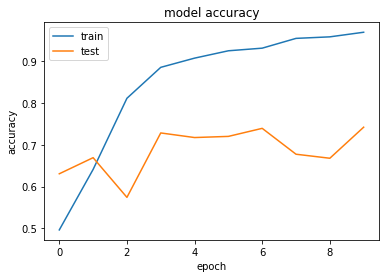

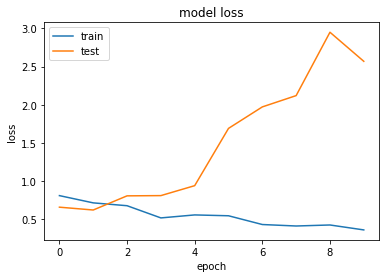

In [55]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()